# Product Classification Using AI & ML

## Introduction

In this project, we aim to develop an **AI-powered product classification system** that automates retail product categorization using machine learning and deep learning techniques. This will help in improving product discoverability, customer experience, and search optimization. 

We will analyze datasets containing product reviews, ratings, and metadata from different categories. The objective is to:

- Identify **key features** that influence product categorization.
- Build **efficient models** that can classify products with high accuracy.
- Improve **search & recommendation** systems for better product discoverability.

To achieve this, we first explore and preprocess the dataset to extract meaningful insights.

---

### Procedure Overview

The key steps in this project include:

1. **Dataset Selection**: Identify the most relevant datasets by applying a sorting metric.
2. **Data Preprocessing**: Analyze available columns, drop unnecessary ones, and clean data.
3. **Feature Engineering**: Extract meaningful features for classification.
4. **Model Training**: Train machine learning models on preprocessed data.
5. **Evaluation & Optimization**: Evaluate performance and optimize models.
6. **Deployment**: Deploy the final model for real-world usage.

---

### Dataset Overview (Link: [Amazon Review Dataset](https://amazon-reviews-2023.github.io/)):

The dataset contains product reviews, ratings, and metadata from different categories. Each dataset is categorized based on the product type. The key columns in the dataset include:

- `# Users`: Number of unique users.
- `# Items`: Number of unique products.
- `# Ratings`: Total number of reviews.
- `R_Token`: Total tokens in review texts.
- `M_Token`: Total tokens in metadata.

Now, let's load and visualize the dataset summary.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

In [1]:
import pandas as pd

# Dataset Information (Manually Entered from Provided Data)
data = {
    "Category": ["All_Beauty", "Amazon_Fashion", "Appliances", "Arts_Crafts_and_Sewing", "Automotive", 
        "Baby_Products", "Beauty_and_Personal_Care", "Books", "CDs_and_Vinyl", "Cell_Phones_and_Accessories", 
        "Clothing_Shoes_and_Jewelry", "Digital_Music", "Electronics", "Gift_Cards", "Grocery_and_Gourmet_Food", 
        "Handmade_Products", "Health_and_Household", "Health_and_Personal_Care", "Home_and_Kitchen", 
        "Industrial_and_Scientific", "Kindle_Store", "Magazine_Subscriptions", "Movies_and_TV", "Musical_Instruments", 
        "Office_Products", "Patio_Lawn_and_Garden", "Pet_Supplies", "Software", "Sports_and_Outdoors", 
        "Subscription_Boxes", "Tools_and_Home_Improvement", "Toys_and_Games", "Video_Games", "Unknown"],
    "Items": [112600, 825900, 94300, 801300, 2000000, 217700, 1000000, 4400000, 701700, 1300000, 
        7200000, 70500, 1600000, 1100, 603200, 164700, 797400, 60300, 3700000, 427500, 
        1600000, 3400, 747800, 213600, 710400, 851700, 492700, 89200, 1600000, 641, 
        1500000, 890700, 137200, 13200000]
}


# Create DataFrame
df = pd.DataFrame(data)

# Sorting the DataFrame by Items
df = df.sort_values(by=["Items"], ascending=False)

# Display dataset information
display(df.head(10))

,Category,Items
33,Unknown,13200000
10,Clothing_Shoes_and_Jewelry,7200000
7,Books,4400000
18,Home_and_Kitchen,3700000
4,Automotive,2000000
28,Sports_and_Outdoors,1600000
20,Kindle_Store,1600000
12,Electronics,1600000
30,Tools_and_Home_Improvement,1500000
9,Cell_Phones_and_Accessories,1300000


---

### Defining the Metric

Now since we're only downloading the Meta Dataset, we only have the use # Items. 
Now how are we going to select the categories?
- We can select the categories based on the number of items in the category.
- We will first sort the categories based on the number of items in the category in ascending order (due to memory constraints).
- We will keep a cumulative sum of the number of items in the category and select the categories until we reach 80% of the total number of items.

#### Computing the Metric

In [2]:
# Some values may be too high, so we calculate the mean and standard deviation to identify outliers
mean = df["Items"].mean()
std = df["Items"].std()
print(f"Mean: {mean}, Standard Deviation: {std}")
print(f"Outliers: {df[df['Items'] > 0.2*mean + 0.5*std]}")

# Remove outliers
df = df[df["Items"] <= 0.2*mean + 0.5*std] # Choosing this interval due to memory constraints

# Display dataset information after removing outliers
display(df.head(10))

Mean: 1415162.9705882352, Standard Deviation: 2544513.8725326178
Outliers:                       Category     Items
33                     Unknown  13200000
10  Clothing_Shoes_and_Jewelry   7200000
7                        Books   4400000
18            Home_and_Kitchen   3700000
4                   Automotive   2000000
28         Sports_and_Outdoors   1600000
20                Kindle_Store   1600000
12                 Electronics   1600000


,Category,Items
30,Tools_and_Home_Improvement,1500000
9,Cell_Phones_and_Accessories,1300000
6,Beauty_and_Personal_Care,1000000
31,Toys_and_Games,890700
25,Patio_Lawn_and_Garden,851700
1,Amazon_Fashion,825900
3,Arts_Crafts_and_Sewing,801300
16,Health_and_Household,797400
22,Movies_and_TV,747800
24,Office_Products,710400


In [3]:
# Calculating the cumulative sum of Items till the sum reaches 70% of the total Items
cum_sum = df["Items"].cumsum()
total_items = df["Items"].sum()  # Fixing here
threshold = 0.7 * total_items
print(threshold)

# Finding the index where the cumulative sum reaches x% of the total Items
index = cum_sum[cum_sum <= threshold].index

if not index.empty:
    index = index[-1]
    df_th = df.loc[:index]  # Fixing slicing
else:
    print("Cumulative sum never reaches x% threshold.")
    df_th = df

# Displaying the DataFrame till the index where the cumulative sum reaches 80% of the total Items
print(df_th)

# Resetting the index of the DataFrame
df_th = df_th.reset_index(drop=True)

# Displaying the DataFrame after resetting the index
print(df_th)

8970878.7
                       Category    Items
30   Tools_and_Home_Improvement  1500000
9   Cell_Phones_and_Accessories  1300000
6      Beauty_and_Personal_Care  1000000
31               Toys_and_Games   890700
25        Patio_Lawn_and_Garden   851700
1                Amazon_Fashion   825900
3        Arts_Crafts_and_Sewing   801300
16         Health_and_Household   797400
22                Movies_and_TV   747800
                      Category    Items
0   Tools_and_Home_Improvement  1500000
1  Cell_Phones_and_Accessories  1300000
2     Beauty_and_Personal_Care  1000000
3               Toys_and_Games   890700
4        Patio_Lawn_and_Garden   851700
5               Amazon_Fashion   825900
6       Arts_Crafts_and_Sewing   801300
7         Health_and_Household   797400
8                Movies_and_TV   747800


In [4]:
# Save the DataFrame to a CSV file
df_th.to_csv("dataset_mapping.csv", index=False)

---

# Selecting Relevant Fields for Category Classification

#### Fields in the Item Metadata Dataset:
1. `main_category` (Target Label) - The primary category of the product.
2. `title` - Contains keywords that may help classification.
3. `description` - Textual description of the product useful for NLP models.
4. `images` - Image URLs can be used for image-based classification.
5. `details` - Contains structured information about brand, material, etc.

#### Dropping the following fields:
- `average_rating`, `rating_number`: These relate to user preference, not category classification.
- `price`: Not relevant for classification.
- `videos`: Require complex preprocessing and aren't textual.
- `store`, `parent_asin`, `bought_together`: Metadata useful for recommendation, not classification.
- `categories`, `features`: Not helpful as some datasets have all values as null.

In [2]:
import json
import pandas as pd

In [3]:
def extract_jsonl(file_name):
    with open(file_name, 'r') as f:
        data = f.readlines()
    return data

In [4]:
def jsonl_to_csv(data, csv_file):
    data = [json.loads(x) for x in data]
    df = pd.DataFrame(data)
    df.to_csv(csv_file, index=False)
    return df

In [5]:
def clean_csv(file):
    df = pd.read_csv(file)
    df = df[['main_category', 'title', 'description', 'images', 'details']]
    df.to_csv(file, index=False)
    return df

### Now the files are named 'dataset0.jsonl.gz' to 'dataset11.jsonl.gz' and the csv files will be named 'dataset0.csv' to 'dataset11.csv' and then will be cleaned to 'dataset_clean.csv'

In [ ]:
for i in range (0,9):
    data = extract_jsonl(f'dataset{i}.jsonl.gz')
    jsonl_to_csv(data, f'dataset{i}.csv')
    print(f'dataset{i}.csv created')

    df = clean_csv(f'dataset{i}.csv')
    df.to_csv(f'dataset{i}_clean.csv', index=False)
    print(f'dataset{i}_clean.csv created')

### Now merge all the files into one csv file in a randomised order

In [16]:
df = pd.concat([pd.read_csv(f'dataset{i}.csv') for i in range(0, 9)])
df = df.sample(frac=1).reset_index(drop=True)
df.to_csv('dataset.csv', index=False)
print('dataset.csv created')

dataset.csv created


#### Data Visualization
- Histograms (Items per category)
- Missing Values (For each column)
- EDAs possible around NLPs (Documentations)
- Hypothesis (Correlation Assumptions)

#### Model Planning
- Classification + NLPs (1st Part)
- Gen AI (2nd Part)

In [5]:
# Load the dataset
df = pd.read_csv("dataset.csv")

# Display the first few rows of the dataset
display(df.head())

# Display the shape of the dataset
print(f"Shape of the dataset: {df.shape}")

# Display the information of the dataset
print(df.info())

# Display the number of missing values in each column
print(df.isnull().sum())

,main_category,title,description,images,details
0,Tools & Home Improvement,WorkShop 87602RP Telescoping Magnetic Pick-Up ...,['- Retrieves ferrous metal objects up to 1/4 ...,[{'thumb': 'https://m.media-amazon.com/images/...,"{'Manufacturer': 'WorkShop', 'Part Number': '8..."
1,Movies & TV,Inspector Morse Set Nine: The Day of The Devil,"['Award winning actor', 'John Thaw', '(', 'Kav...",[{'thumb': 'https://m.media-amazon.com/images/...,"{'Genre': 'Music Videos & Concerts', 'Format':..."
2,Tools & Home Improvement,Cable Clamps 1-1/2 Inch Rubber Cushioned 304 S...,['1-1/2 Inch Cable Clamp 20 Pcs Stainless Stee...,[{'thumb': 'https://m.media-amazon.com/images/...,"{'Manufacturer': 'Zovfam', 'Part Number': '1-1..."
3,Toys & Games,"Traxxas 3281 Split Bevel Cone, Nitro Vee","['Product Description', ""Cone, split beveled U...",[{'thumb': 'https://m.media-amazon.com/images/...,{'Product Dimensions': '3.13 x 0.25 x 4.38 inc...
4,All Beauty,aSulis Natural Long Wavy Curly Wig Dark Roots ...,[],[{'thumb': 'https://m.media-amazon.com/images/...,"{'Color': 'Dark brown trend to Black', 'Materi..."


Shape of the dataset: (6193740, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193740 entries, 0 to 6193739
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   main_category  object
 1   title          object
 2   description    object
 3   images         object
 4   details        object
dtypes: object(5)
memory usage: 236.3+ MB
None
main_category      0
title            355
description        0
images             0
details            0
dtype: int64


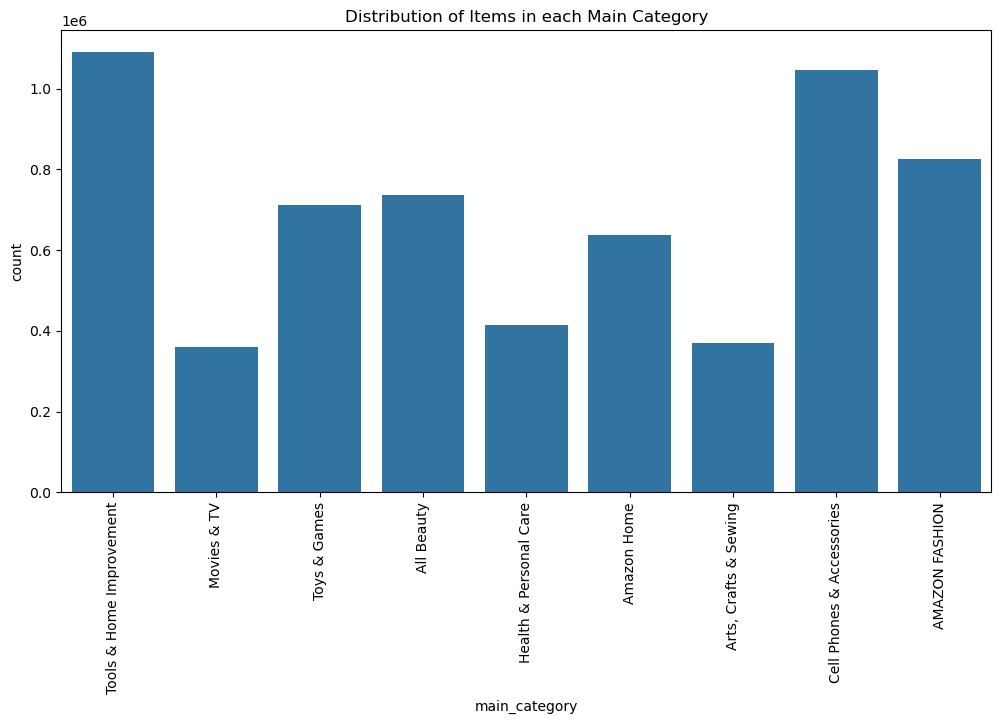

In [7]:
# Displaying histograms for the 'main_category' column
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="main_category")
plt.xticks(rotation=90)
plt.title("Distribution of Items in each Main Category")
plt.show()

In [12]:
# Number of null values in 'title' and empty string ([]) in 'description' column
null_title = df["title"].isnull().sum()
empty_description = df[df["description"] == "[]"].shape[0]

# Display the number of null values in 'title' and empty string ([]) in 'description' column
print(f"Number of null values in 'title': {null_title}")
print(f"Number of empty string ([]) in 'description': {empty_description}")


Number of null values in 'title': 355
Number of empty string ([]) in 'description': 2945529


In [1]:
import pandas as pd
df = pd.read_csv("dataset.csv")

# Finding correlation between rows that have null values in titles and empty strings in descriptions
correlation = df[df["title"].isnull()]["description"].apply(lambda x: x == "[]").sum()

In [ ]:
print(f"Correlation between rows that have null values in titles and empty strings in descriptions: {correlation}")

Correlation between rows that have null values in titles and empty strings in descriptions: 190


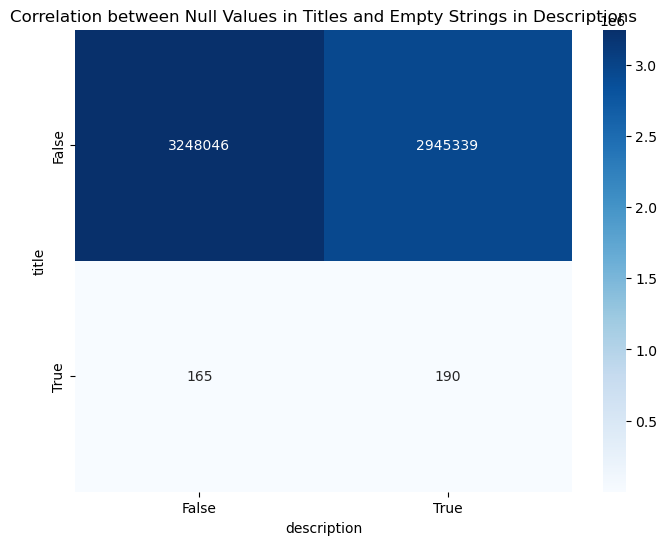

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seeing how many rows that have null values in titles have empty strings in descriptions and vice versa via a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df["title"].isnull(), df["description"] == "[]"), annot=True, fmt="d", cmap="Blues")
plt.title("Correlation between Null Values in Titles and Empty Strings in Descriptions")
plt.show()


In [8]:
# Statistical Analysis
# Number of rows having null values in titles, that have empty strings in descriptions, out of total rows having null values in titles
null_title = df["title"].isnull().sum()
empty_description = df[df["description"] == "[]"].shape[0]
correlation = df[df["title"].isnull()]["description"].apply(lambda x: x == "[]").sum()
percentage = (correlation / null_title) * 100
print(f"Percentage of rows having null values in titles, that have empty strings in descriptions, out of total rows having null values in titles: {percentage:.2f}%")

# Number of rows having empty strings in descriptions, that have null values in titles, out of total rows having empty strings in descriptions
percentage = (correlation / empty_description) * 100
print(f"Percentage of rows having empty strings in descriptions, that have null values in titles, out of total rows having empty strings in descriptions: {percentage:.2f}%")

Percentage of rows having null values in titles, that have empty strings in descriptions, out of total rows having null values in titles: 53.52%
Percentage of rows having empty strings in descriptions, that have null values in titles, out of total rows having empty strings in descriptions: 0.01%


In [13]:
# Now we'll remove all the null values from the title and empty strings ([]) from the description column

# Removing null values from 'title' column
df = df.dropna(subset=["title"])

# Removing empty strings ([]) from 'description' column
df = df[df["description"] != "[]"]

# Resetting the index of the DataFrame
df = df.reset_index(drop=True)

# Saving this cleaned dataset to a new CSV file
df.to_csv("cleaned_dataset.csv", index=False)

In [ ]:
# Let's plan on doing some EDAs regarding NLPs
# Basically the columns 'title' and 'description' are the ones we are interested in.

# Load the cleaned dataset
df = pd.read_csv("cleaned_dataset.csv")

# Display the first few rows of the dataset
display(df.head())

,main_category,title,description,images,details
0,Tools & Home Improvement,WorkShop 87602RP Telescoping Magnetic Pick-Up ...,['- Retrieves ferrous metal objects up to 1/4 ...,[{'thumb': 'https://m.media-amazon.com/images/...,"{'Manufacturer': 'WorkShop', 'Part Number': '8..."
1,Movies & TV,Inspector Morse Set Nine: The Day of The Devil,"['Award winning actor', 'John Thaw', '(', 'Kav...",[{'thumb': 'https://m.media-amazon.com/images/...,"{'Genre': 'Music Videos & Concerts', 'Format':..."
2,Tools & Home Improvement,Cable Clamps 1-1/2 Inch Rubber Cushioned 304 S...,['1-1/2 Inch Cable Clamp 20 Pcs Stainless Stee...,[{'thumb': 'https://m.media-amazon.com/images/...,"{'Manufacturer': 'Zovfam', 'Part Number': '1-1..."
3,Toys & Games,"Traxxas 3281 Split Bevel Cone, Nitro Vee","['Product Description', ""Cone, split beveled U...",[{'thumb': 'https://m.media-amazon.com/images/...,{'Product Dimensions': '3.13 x 0.25 x 4.38 inc...
4,Toys & Games,Mosailles Born to Rock Glitter Banner with Mus...,"[""It is perfect for any parties like baby's 1s...",[{'thumb': 'https://m.media-amazon.com/images/...,"{'Product Dimensions': '56""L x 56""W', 'Item We..."


ModuleNotFoundError: No module named 'wordcloud'

In [13]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [15]:
# EDAs on NLPs
%pip install wordcloud
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# WordCloud for 'title' column
plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["title"]))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for 'title' column")
plt.show()

# WordCloud for 'description' column
plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["description"]))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for 'description' column")
plt.show()

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'wordcloud'